<a href="https://colab.research.google.com/github/slc120/spacecraft-anom-exp/blob/main/ML_School_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Keras useful links:


*   Losses: https://www.tensorflow.org/api_docs/python/tf/keras/losses
* Optimizers: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
* Activation functions: https://www.tensorflow.org/api_docs/python/tf/keras/activations


# 1. Aproximación de funciones con redes neuronales profundas
El aprendizaje profundo ha demostrado su gran capacidad para aprender representaciones no lineales complejas.

Para iniciar, aproximaremos la función no lineal f(x) = sin(x) usando una red neuronal profunda.

Esto es un problema de REGRESIÓN, usamos mse como función de pérdida.

Primero generamos el conjunto de datos de pares de entradas-salidas usando la librería numpy.



In [ ]:
import numpy as np
# generate input data - Train set
x = np.linspace(0, 2*np.pi, 1000)
# generate output data
y = np.sin(x)

Ahora crearemos un modelo de red neuronal usando TensorFlow compuesto por 2 capas densas de 64 neuronas, con función de activación relu.

In [ ]:
import tensorflow as tf

# define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

Se debe compilar el modelo, es decir, asignar el optimizador y la pérdida.

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mse')

Usamos la función fit() para entrenar el modelo, le asignamos la cantitad de épocas.




In [ ]:
# train the model
model.fit(x, y, epochs=5, verbose=1)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4791
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3249
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2354
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1843
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1477


Podemos entonces usar el modelo entrenado para predecir la salida para valores nuevos.



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


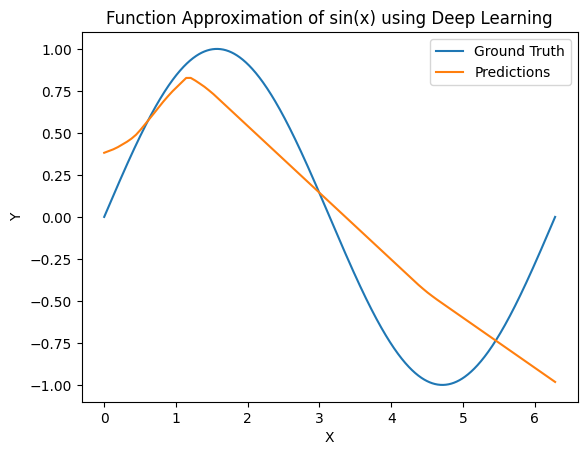

In [ ]:
# generate new input data - Test
x_new = np.linspace(0, 2*np.pi, 100)

# make predictions using the trained model
y_pred = model.predict(x_new)
# plot the results

import matplotlib.pyplot as plt
plt.plot(x, y, label='Ground Truth')
plt.plot(x_new, y_pred, label='Predictions')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Function Approximation of sin(x) using Deep Learning')
plt.legend()
plt.show()


¿Qué cambiaría para obtener un mejor resultado?

¿Con el mismo modelo podríamos ver qué pasa para un x>2π?

Ahora aproximemos una función de 2 variables:
f(x, y) = sin(x) * cos(y)

In [ ]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras import layers, models

Generamos los datos:

In [ ]:
# Rango de entrada
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)
X, Y = np.meshgrid(x, y)

# Función objetivo: f(x, y) = sin(x) * cos(y)
Z = np.sin(X) * np.cos(Y)

# Preparar datos para entrenamiento
X_data = np.stack([X.ravel(), Y.ravel()], axis=1)
y_data = Z.ravel()


Qué tamaño tienen los datos ya estructurados?

In [ ]:
print("Entrada, ",X_data.shape)
print("Objetivo, ",y_data.shape)

Entrada,  (10000, 2)
Objetivo,  (10000,)


Separamos el conjunto de entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

Definimos nuestro modelo. Modifiquelo como desee:


*   Agregando o quitando capas
*   Agregando o quitando neuronas
*   Cambiando las funciones de activación



In [ ]:
model = models.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(8, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1)  # salida escalar
])

model.compile(optimizer='adam', loss='mse')
model.summary() # muestra la arquitectura de la red
# n_params=(n_inputs×n_units)+n_units

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185 (740.00 B)

 Trainable params: 185 (740.00 B)

 Non-trainable params: 0 (0.00 B)

Entrenamos el modelo, podemos o no definir el tamaño del batch

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2763 - val_loss: 0.1009
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0824 - val_loss: 0.0411
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0347 - val_loss: 0.0216
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0193 - val_loss: 0.0148
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0151 - val_loss: 0.0126
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0128 - val_loss: 0.0115
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0121 - val_loss: 0.0108
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0118 - val_loss: 0.0104
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0101 - val_loss: 0.0106
Epoch 10/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0104 - val_loss: 0.0114
Epoch 11/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0106 - val_loss: 0.0093
Epoch 12/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Graficamos las pérdidas de entrenamiento y validación

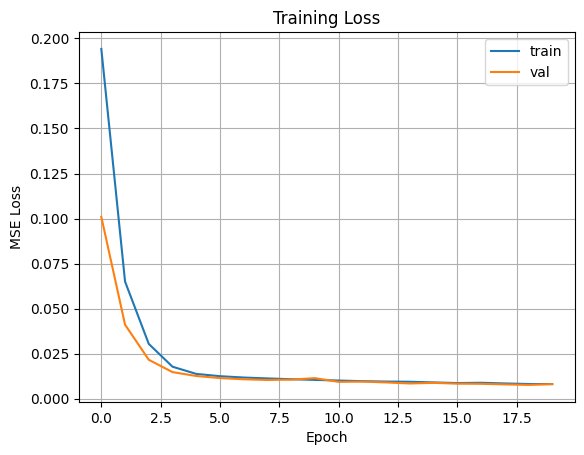

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid()
plt.title("Training Loss")
plt.show()

Visualización de las predicciones

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


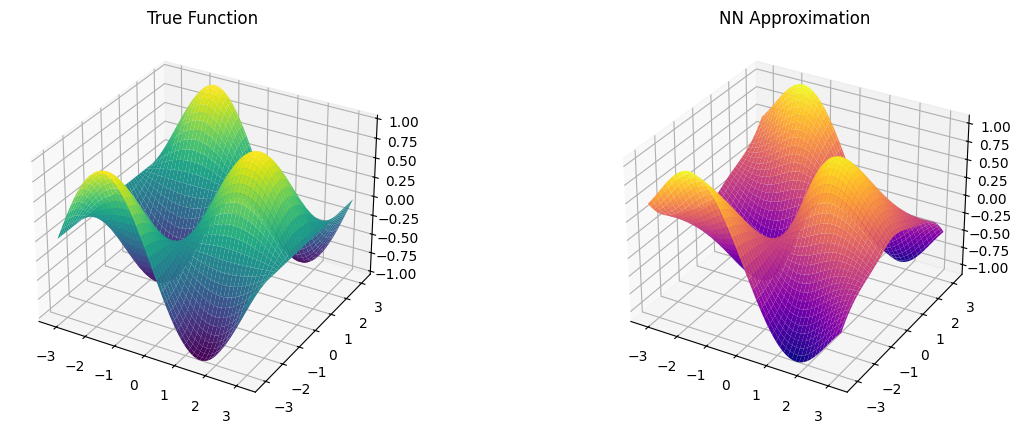

In [ ]:
y_pred = model.predict(X_data).reshape(X.shape)

# Visualización 3D
fig = plt.figure(figsize=(14, 5))

# Ground truth
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title("True Function")

# Predicción
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, y_pred, cmap='plasma')
ax2.set_title("NN Approximation")

plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


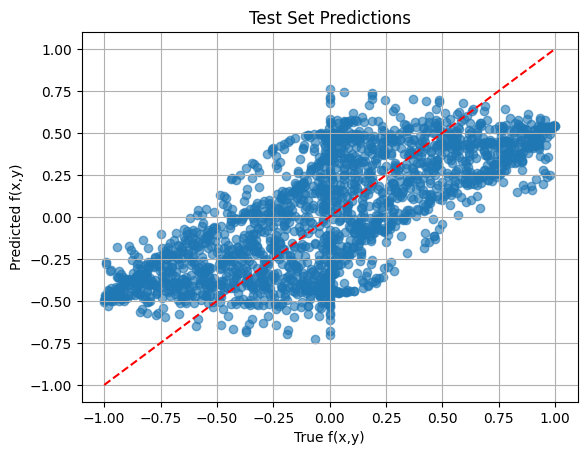

In [ ]:
# Predecir en test set
y_test_pred = model.predict(X_test).flatten()

# Comparar target vs predicciones
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel("True f(x,y)")
plt.ylabel("Predicted f(x,y)")
plt.title("Test Set Predictions")
plt.plot([-1, 1], [-1, 1], 'r--')  # línea identidad
plt.grid()
plt.show()



---



# Clasificación de imágenes con redes neuronales profundas

Set up TensorFlow

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


Cargar base de datos MNIST. Los pixeles de las imágenes tienen valores desde 0 a 255. Podemos escalar estos valores a un rango de 0 a 1 dividiendo entre 255.0.

Esto también convierte los valores en float.
Probar sin esto también

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

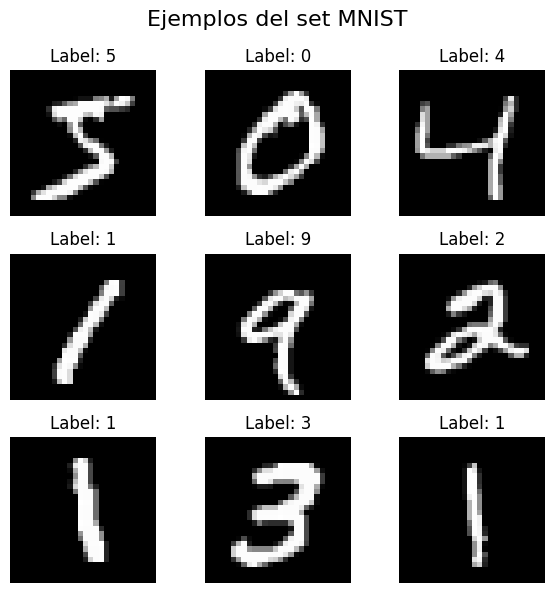

In [ ]:
# Visualizar las primeras 9 imágenes del conjunto de entrenamiento
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Ejemplos del set MNIST", fontsize=16)
plt.tight_layout()
plt.show()

Construimos nuestra red neuronal

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Veamos alguinas predicciones.
No hay activación aquí → esto entrega logits.

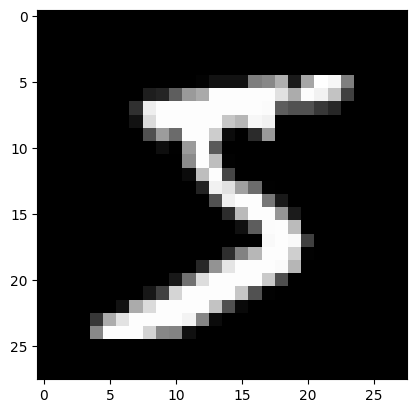

In [ ]:
plt.imshow(x_train[0], cmap='gray')

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.84912586,  0.55969465,  0.21118352, -0.4344796 , -0.35785523,
        -0.15319626, -0.022461  ,  0.49872023,  0.09457627, -0.06949213]],
      dtype=float32)

Para convertir esto en probabilidades interpretables (que suman 1), se aplica tf.nn.softmax function

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.19185714, 0.14364137, 0.1013732 , 0.05315146, 0.05738426,
        0.07041659, 0.0802514 , 0.13514462, 0.09021551, 0.07656447]],
      dtype=float32)

Note: Es posible aplicar tf.nn.softmax como activación en la última capa. Esto hace que las salidas sean más interpretables, pero no se recomienda porque impide una cálculo estable y preciso de la pérdida (loss)

Antes de comenzar el entrenamiento, configura y compila el modelo usando Model.compile de Keras. Establece la clase de optimizador en adam, asigna la función de pérdida (loss) a la función loss_fn que definiste anteriormente, y especifica una métrica para evaluar el modelo configurando el parámetro metrics en accuracy.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

Ahora entrenamos el modelo

In [ ]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8590 - loss: 0.4861
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9558 - loss: 0.1467
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9678 - loss: 0.1110
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9724 - loss: 0.0902
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9772 - loss: 0.0724
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9780 - loss: 0.0669
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9821 - loss: 0.0565
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9834 - loss: 0.0521
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9859 - loss: 0.0442
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0434
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9871 - loss: 0.0389
Epoch 12/20
1875/1875 ━━━━━━━━

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.1580 - loss: 2.3521


[2.3520963191986084, 0.15800000727176666]

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probs = probability_model(x_test[:5])

for i in range(5):
    print(f"Ejemplo {i+1}")
    print(f"Etiqueta real: {y_test[i]}")
    print(f"Vector de probabilidades:\n{probs[i].numpy()}")
    print(f"Clase predicha: {np.argmax(probs[i])}")
    print('-' * 40)

Ejemplo 1
Etiqueta real: 7
Vector de probabilidades:
[0.1959282  0.11009074 0.11436072 0.05897472 0.07946131 0.0491657
 0.07399236 0.08359021 0.14215451 0.09228148]
Clase predicha: 0
----------------------------------------
Ejemplo 2
Etiqueta real: 2
Vector de probabilidades:
[0.17008038 0.09265363 0.12943135 0.02988273 0.09698547 0.0783985
 0.05883035 0.11344192 0.1489955  0.08130018]
Clase predicha: 0
----------------------------------------
Ejemplo 3
Etiqueta real: 1
Vector de probabilidades:
[0.11522745 0.11704519 0.09682821 0.06824841 0.09788176 0.11858228
 0.09758288 0.10069694 0.09543892 0.09246793]
Clase predicha: 5
----------------------------------------
Ejemplo 4
Etiqueta real: 0
Vector de probabilidades:
[0.2793937  0.14481612 0.10138744 0.03000011 0.11311899 0.04128806
 0.03595129 0.07392917 0.10676514 0.07335002]
Clase predicha: 0
----------------------------------------
Ejemplo 5
Etiqueta real: 4
Vector de probabilidades:
[0.13087909 0.09689073 0.09070541 0.09207159 0.07

# Visualización de capas convolucionales

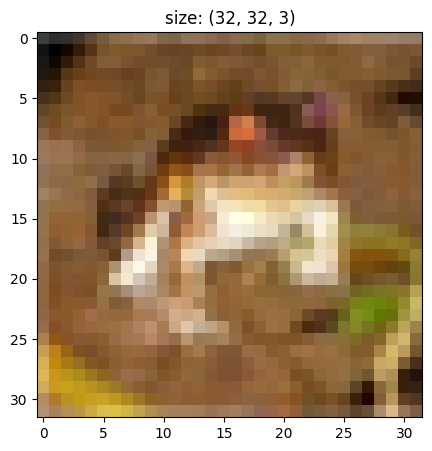

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
import matplotlib.pyplot as plt
import numpy as np

# 1. Cargar una imagen de CIFAR10
(x_train, y_train), _ = cifar10.load_data()
x_sample = x_train[0]  # tomar una imagen
x_input = x_sample[np.newaxis, ...] / 255.0  # normalizar y añadir dimensión batch

fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.imshow(x_sample)
axs.set_title(f'size: {x_sample.shape}')
plt.show()


In [ ]:
# 2. Construir una CNN simple
inputs = Input(shape=(32, 32, 3))
x = Conv2D(8, (3, 3), activation='relu', name='conv1',padding='same')(inputs)
x = MaxPooling2D((2, 2))(x)
# Aquí tenemos 16x16
x = Conv2D(8, (3, 3), activation='relu', name='conv2')(x)
x = Flatten()(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs, x)

In [ ]:
# 3. Crear un nuevo modelo para obtener la salida de una capa intermedia
layer_name = 'conv2'  # o 'conv2'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

#output_size=(input_size−kernel_size)/stride+1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


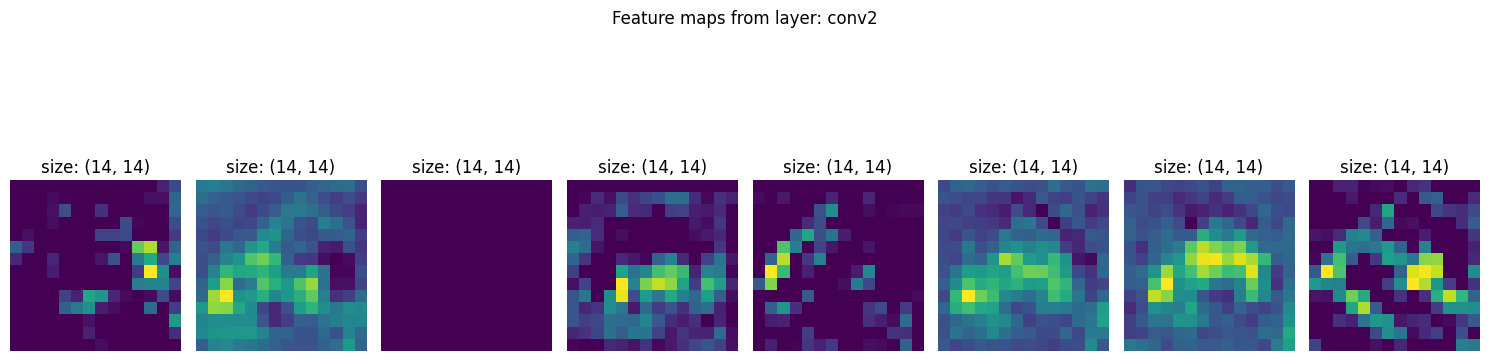

In [ ]:
# 4. Obtener activaciones (feature maps)
feature_maps = intermediate_layer_model.predict(x_input)

# 5. Visualizar
num_filters = feature_maps.shape[-1]
fig, axs = plt.subplots(1, num_filters, figsize=(15, 5))
for i in range(num_filters):
    axs[i].imshow(feature_maps[0, :, :, i], cmap='viridis')
    axs[i].axis('off')
    axs[i].set_title(f'size: {feature_maps[0, :, :, i].shape}')
plt.suptitle(f'Feature maps from layer: {layer_name}')
plt.tight_layout()
plt.show()

# DNN for broadening parameters determination

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Simulación de espectros que dependen de vsini
def simulate_spectrum(vsini, center=4552.0, N=161):
    wave = np.linspace(center - 2, center + 2, N)
    broadening = vsini / 100  #
    profile = 1 - np.exp(-((wave - center) / broadening)**2)
    noise = np.random.normal(0, 0.005, size=profile.shape)
    return wave, profile + noise

# Generar dataset
n_samples = 4000
vsini_vals = np.random.uniform(20, 300, n_samples)

spectra = []
for v in vsini_vals:
    _, spec = simulate_spectrum(v)
    spectra.append(spec)

spectra = np.array(spectra)  # (4000, 161)
labels = vsini_vals.reshape(-1, 1)  # (4000, 1)


In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(spectra)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, labels, test_size=0.2, random_state=42
)

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(161,)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(2)  # vsini, vmacro
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,658 (57.26 KB)

 Trainable params: 14,658 (57.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 30070.8887 - mae: 151.6362 - val_loss: 24807.8926 - val_mae: 133.1109
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22550.3203 - mae: 124.8326 - val_loss: 18357.5352 - val_mae: 107.5684
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15375.6865 - mae: 95.5542 - val_loss: 7946.1704 - val_mae: 64.6805
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5820.6772 - mae: 53.4458 - val_loss: 1702.0391 - val_mae: 28.7296
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1284.5343 - mae: 25.1944 - val_loss: 478.2819 - val_mae: 15.6164
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 586.7304 - mae: 18.2402 - val_loss: 298.1400 - val_mae: 12.4365
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 549.5262 - mae: 17.6249 - val_loss: 256.7198 - val_mae: 11.4907
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 449.9689 - mae: 15.8956 - val_loss: 251.1412 - val_mae: 11.6737
Epoch 

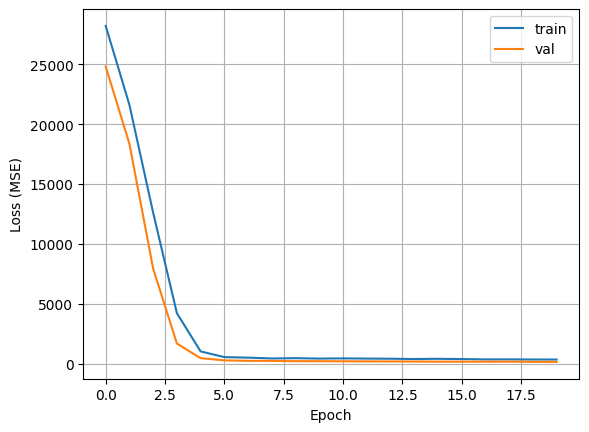

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


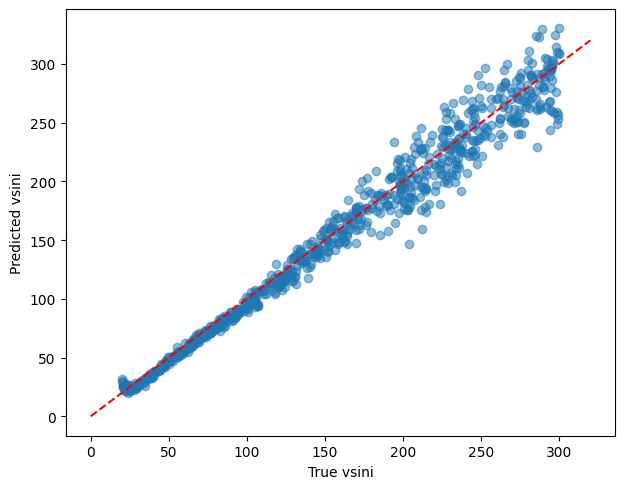

In [ ]:
y_pred = model.predict(X_test)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
plt.xlabel("True vsini")
plt.ylabel("Predicted vsini")
plt.plot([0, 320], [0, 320], 'r--')


plt.tight_layout()
plt.show()

# CNN for Halpha profile classification

In [ ]:
def generate_profile(label, N=161, center=6563.0):
    wave = np.linspace(center - 10, center + 10, N)

    if label == 0:  # Absorción
        profile = 1 - np.exp(-((wave - center)/1.5)**2)
    elif label == 1:  # Emisión
        profile = 1 + np.exp(-((wave - center)/1.0)**2)
    else:  # P Cygni: emisión + absorción desplazada
        absorption = 1 - 0.5*np.exp(-((wave - (center - 1.0))/0.8)**2)
        emission   = 1 + 0.5*np.exp(-((wave - center)/1.2)**2)
        profile = (absorption + emission) / 2

    noise = np.random.normal(0, 0.01, N)
    return wave, profile + noise


In [ ]:
n_samples = 3000
X = []
y = []

for _ in range(n_samples):
    label = np.random.choice([0, 1, 2])  # 0: Abs, 1: Em, 2: PC
    _, prof = generate_profile(label)
    X.append(prof)
    y.append(label)

X = np.array(X)
y = np.array(y)
X = X[..., np.newaxis]  # (N, 161, 1) para CNN 1D

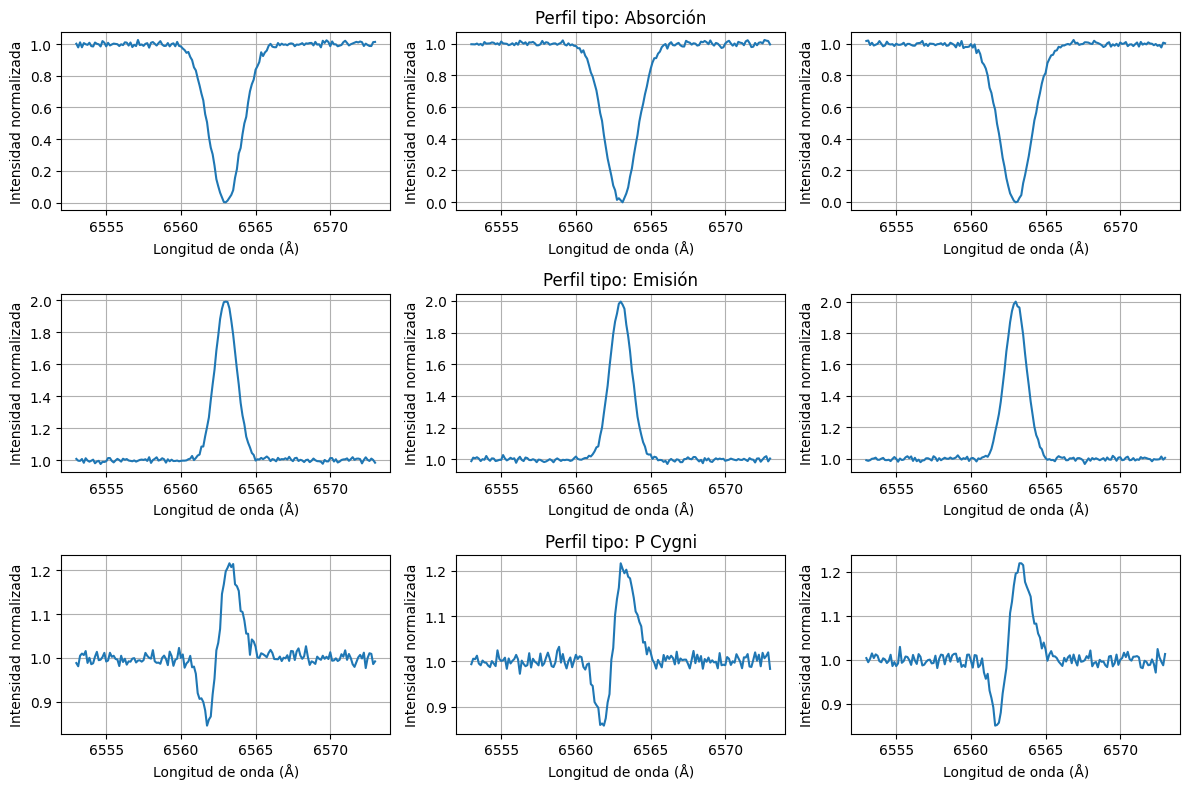

In [ ]:

labels_names = {0: 'Absorción', 1: 'Emisión', 2: 'P Cygni'}

plt.figure(figsize=(12, 8))

for label in [0, 1, 2]:
    # Tomar 3 índices al azar con esa etiqueta
    indices = np.where(y == label)[0][:3]
    for i, idx in enumerate(indices):
        wave = np.linspace(6563 - 10, 6563 + 10, 161)
        profile = X[idx, :, 0]
        plt.subplot(3, 3, label * 3 + i + 1)
        plt.plot(wave, profile)
        if i == 1:
            plt.title(f'Perfil tipo: {labels_names[label]}')
        plt.xlabel('Longitud de onda (Å)')
        plt.ylabel('Intensidad normalizada')
        plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
y_train_cat = to_categorical(y_train, 3)
y_test_cat = to_categorical(y_test, 3)

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(161,1)),
    layers.Conv1D(2, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(4, kernel_size=3, activation='relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 157, 2)         │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 78, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 76, 4)          │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ (None, 4)              │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171 (684.00 B)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3257 - loss: 1.0994 - val_accuracy: 0.3042 - val_loss: 1.0992
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3476 - loss: 1.0954 - val_accuracy: 0.3042 - val_loss: 1.0952
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3680 - loss: 1.0825 - val_accuracy: 0.3042 - val_loss: 1.0756
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3500 - loss: 1.0528 - val_accuracy: 0.3042 - val_loss: 1.0185
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4888 - loss: 0.9757 - val_accuracy: 0.3833 - val_loss: 0.9252


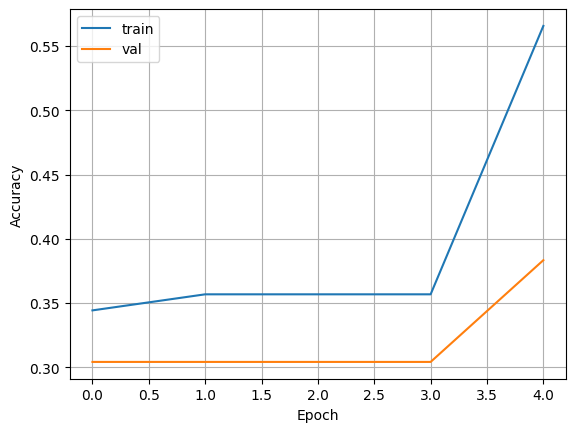

In [ ]:
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    verbose=1
)

# Accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


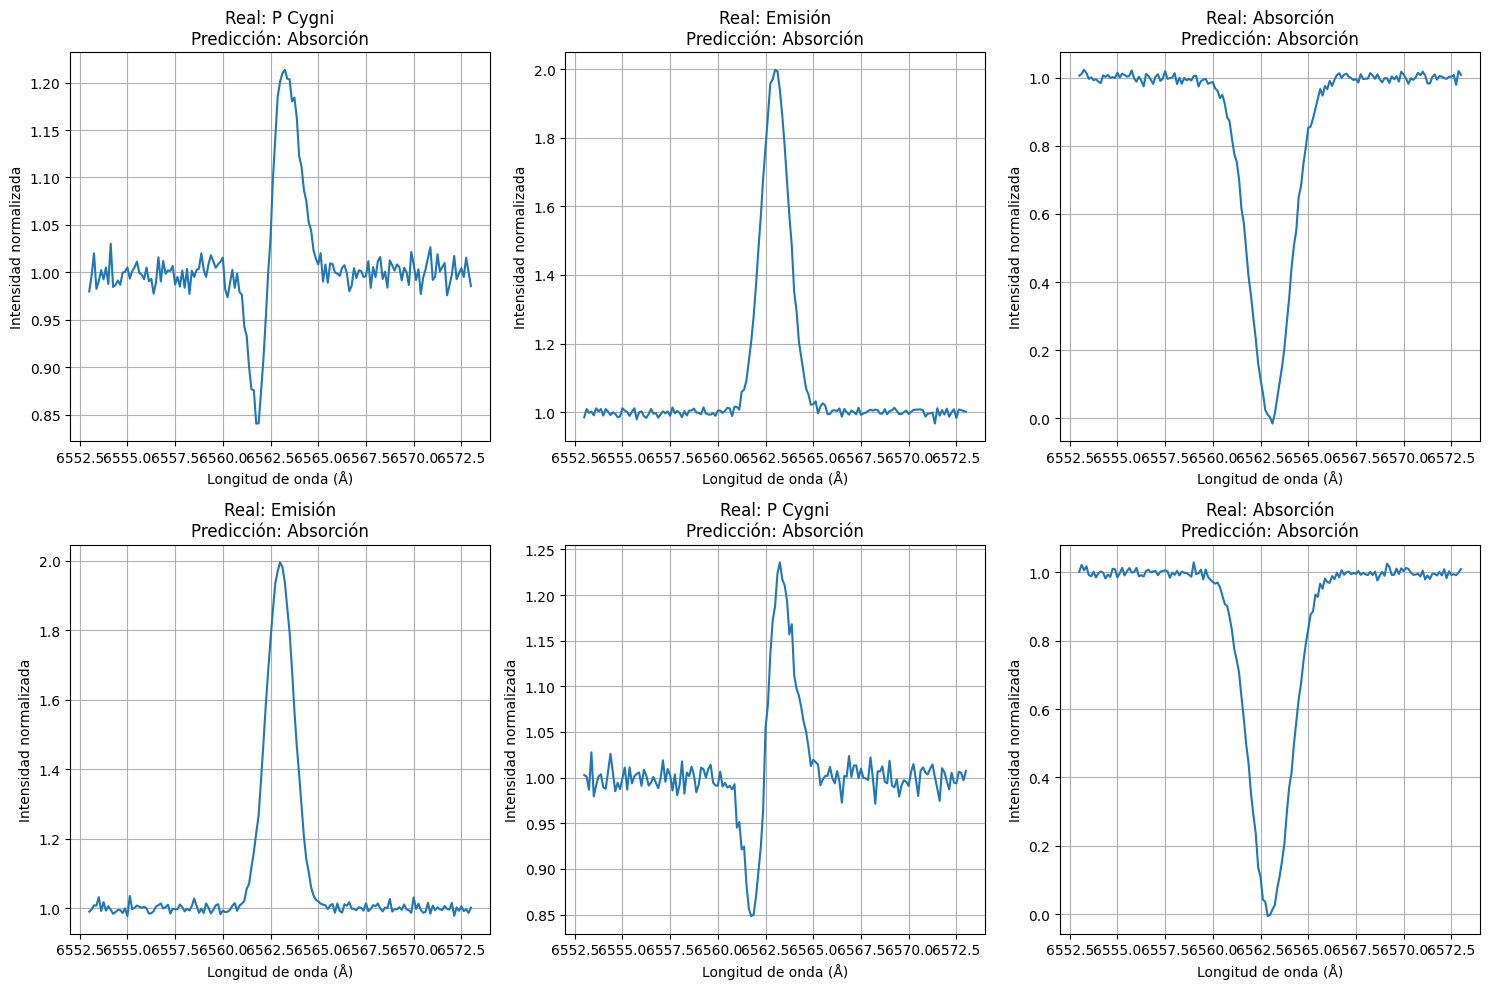

In [ ]:
num_examples = 6
indices = np.random.choice(len(X_test), size=num_examples, replace=False)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(indices):
    profile = X_test[idx]
    true_label = y_test[idx]

    # Predecir con el modelo
    pred_logits = model.predict(profile[np.newaxis, ...])
    pred_label = np.argmax(pred_logits, axis=1)[0]

    plt.subplot(2, 3, i + 1)
    plt.plot(wave, profile.squeeze())
    plt.title(f"Real: {labels_names[true_label]}\nPredicción: {labels_names[pred_label]}")
    plt.xlabel("Longitud de onda (Å)")
    plt.ylabel("Intensidad normalizada")
    plt.grid(True)

plt.tight_layout()
plt.show()